In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
import fit_module as af
import retina.working_retina_module as mr
import visual_stimulus_module as vs

## Load a stimulus file

In [2]:
movie = vs.NaturalMovie('/home/henhok/nature4_orig35_fps100.avi', fps=100, pix_per_deg=60)

Loaded movie file with dimensions 720 x 576 px, 1000 frames at 100 fps.


## Create a RGC mosaic

In [3]:
gc_type = 'parasol'
response_type = 'on'

In [4]:
mos = mr.ConstructRetina(gc_type, response_type, [4,5], [-5,5], randomize_position=0.1)
mos.build()

Fitting spatial  filters:   3%|▎         | 3/90 [00:00<00:03, 28.36it/s]


[parasol on]
Read 94 units from datafile and then removed 4 bad units (handpicked)
Fitting DoG model, surround is fixed


Fitting temporal filters: 100%|██████████| 90/90 [00:01<00:00, 77.99it/s]
WARNING    /home/henhok/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
 [py.warnings]
WARNING    /home/henhok/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
 [py.warnings]


Built RGC mosaic with 48 units


In [5]:
# Here stimulus dimensions must match loaded video
ret = mr.SimulateRetina(mos.gc_df, gc_type, response_type, retina_center=5+0j,
                         stimulus_width_pix=720, stimulus_height_pix=576)

In [7]:
ret.load_stimulus(movie)

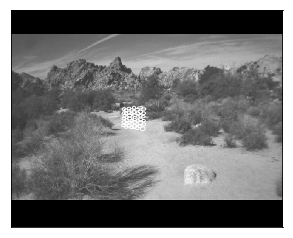

In [8]:
ret.show_stimulus_with_gcs()

## See how contrast behaves locally

Text(0.5, 1.0, 'Local RMS contrast')

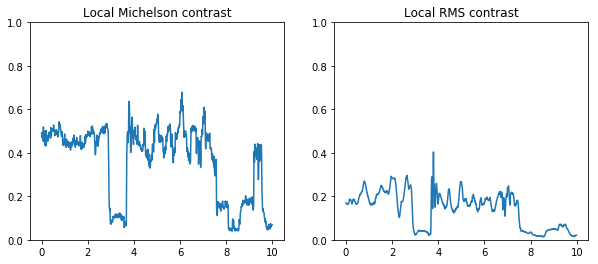

In [9]:
cell_ix = 0
plt.subplots(1,2, figsize=(10,4))
plt.subplot(121)
ret.plot_local_michelson_contrast(cell_ix)
plt.title('Local Michelson contrast')
plt.subplot(122)
ret.plot_local_rms_contrast(cell_ix)
plt.title('Local RMS contrast')

## Simulate

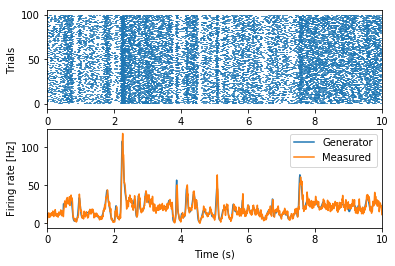

In [11]:
ret.run_single_cell(cell_ix, n_trials=100, viz_module=True);